<a href="https://colab.research.google.com/github/rosanahjk/testPublico/blob/main/Desaf%C3%ADo_Final_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**DIPLOMATURA EN DATA SCIENCE PARA LA TOMA DE DECISIONES-Curso de Python**

**2024**

---Desafio final Python

Esta notebook tiene como objetivo realizar EDA . Exploraremos librerías, paquetes y funciones esenciales que facilitarán la manipulación y el procesamiento de datos, ayudándonos a comprender mejor cómo analizar y describir conjuntos de datos.
Recuerda realizar un análisis exploratorio de datos (EDA) utilizando Pandas. Debes manejar, limpiar, analizar y visualizar el conjunto de datos proporcionado, como en el desafio 2

Consignas:

* Elegir un problema de aprendizaje automático: puede ser un problema de regresión, clasificación o clustering. Justifica la elección.
Preprocesar los datos: Realizar cualquier limpieza y transformación necesaria en el conjunto de datos.
* Construir y entrenar el modelo: Implementa un algoritmo de aprendizaje automático adecuado para el problema (por ejemplo, regresión lineal, regresión logística, k-means, etc.).
* Evaluar el modelo: Utiliza métricas de evaluación apropiadas (precisión, recall, F1-score, curva ROC, AUC, etc.) para medir el rendimiento del modelo. Aplica validación cruzada si es necesario.
* Optimización de hiperparámetros: Si el modelo lo permite, utiliza GridSearchCV o RandomizedSearchCV para encontrar los mejores hiperparámetros.
* Documentar y visualizar: Presenta los hallazgos mediante gráficos y visualizaciones que ayuden a entender el rendimiento del modelo y cualquier patrón interesante en los datos.


In [78]:
# Limpieza de datos, escalado y estandarización
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Visualización y uso de datos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


# Modelos de aprendizaje y selección de parámetros
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from scipy.stats import randint
import xgboost as xgb

# Métricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.linear_model import LogisticRegression



# Leer dataset Predicción de Diabetes -

El conjunto de datos de Kaggle para la predicción de diabetes contiene información médica y demográfica de pacientes, junto con su diagnóstico de diabetes (positivo o negativo). Incluye variables como la edad, el sexo, el índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, historial de tabaquismo, niveles de HbA1c y glucosa en sangre. Este dataset es útil para construir modelos de aprendizaje automático que predigan la diabetes basándose en el historial médico y la información demográfica de los pacientes. Puede ayudar a los profesionales de la salud a identificar pacientes en riesgo y desarrollar tratamientos personalizados, así como a los investigadores a explorar las relaciones entre factores médicos y la probabilidad de desarrollar diabetes.
Acá un poco más del dataset [Predicción de diabetes](https://www.kaggle.com/code/octavioberruti/prediccion-de-diabetes-eda-random-forest-95)

In [94]:
# Cargar el conjunto de datos en un dataframe de Pandas
url = "https://github.com/yiranamejia/Prediccion-de-Diabetes/raw/main/diabetes_prediction_dataset%5B1%5D.csv"
df= pd.read_csv(url)


# Describe los atributos del dataset

# Un poco del dataset, exploracion y atributos

In [95]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.info()

# no se visualia datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [81]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [82]:
# obtenemos lista de valores únicos o un array(matriz) de cada columna, o sea los valores distintos que aparecen en cada columna
for column in df.columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    print(f"En la columna '{column}':")
    print(unique_values)
    print(f"Total de valores únicos: {total_unique}\n")

En la columna 'gender':
['Female' 'Male' 'Other']
Total de valores únicos: 3

En la columna 'age':
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
Total de valores únicos: 102

En la columna 'hypertension':
[0 1]
Total de valores únicos: 2

En la columna 'heart_disease':
[1 0]
Total de valores únicos: 2

En la columna 'smoking_history':
['never' 'No Info' 'current' 'former' 'ever' 'not current']
Total de valores únicos: 6

En la col

In [83]:
# @title
# Revisión de valores nulos en df_unido con la función isnull().sum()
# La función isnull() identifica los valores nulos en el DataFrame,
# y la función sum() cuenta la cantidad de valores nulos por cada columna.
print("Valores nulos en df1_personas:")
print(df.isnull().sum())
print("\n")


#comentarios: Solo dos culumnas estan presentando valores nulos

Valores nulos en df1_personas:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64




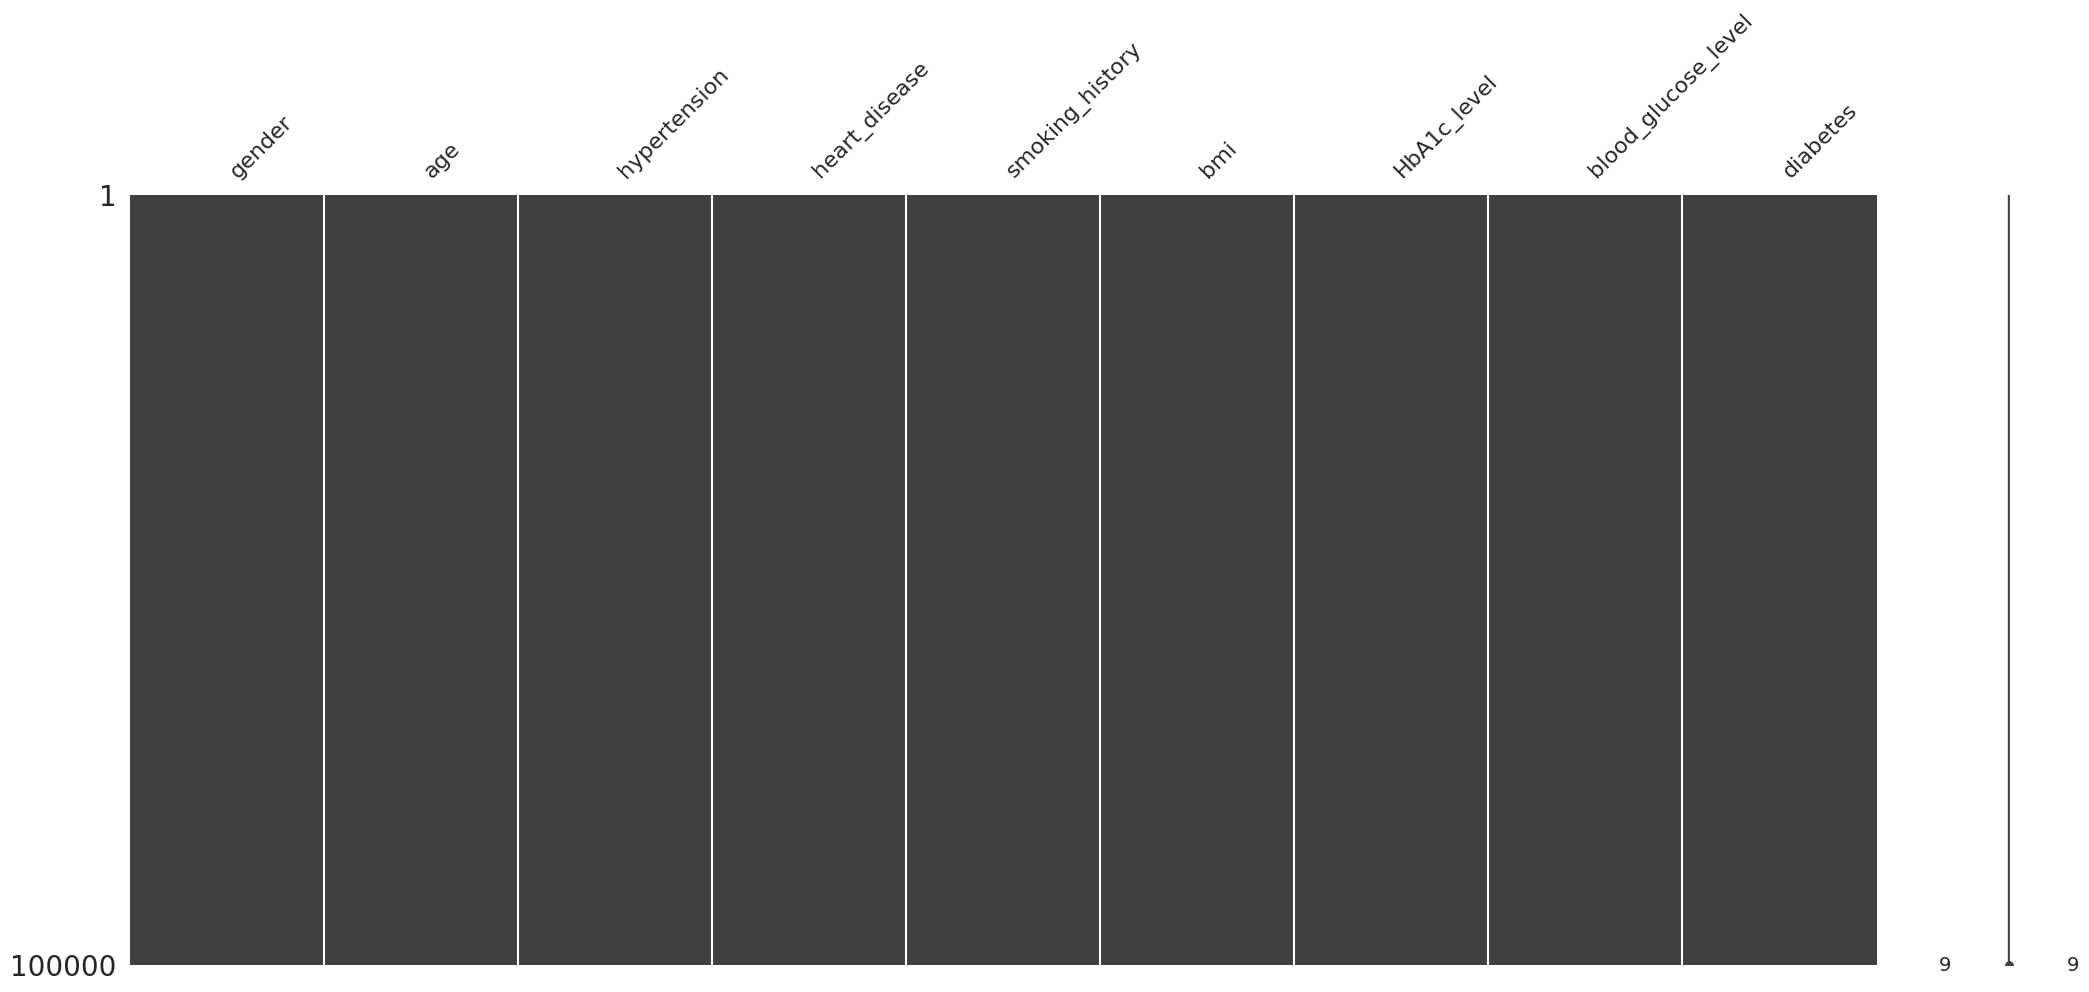

In [84]:
# visualizo que no hay datos faltantes
msno.matrix(df)
plt.show()

In [85]:
#Manejamos los valores duplicados
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

# Eliminar las filas duplicadas del DataFrame original
df = df.drop_duplicates()

# Verificar si se eliminaron
print("Tamaño del DataFrame después de eliminar duplicados:", df.shape)

number of duplicate rows:  (3854, 9)
Tamaño del DataFrame después de eliminar duplicados: (96146, 9)


In [96]:
#Removemos el valor extraño en la variable "gender"
df['gender'].unique()

df = df[df['gender'] != 'Other']

# Seleccionando atributos de interes
incluye variables como la edad, el sexo, el índice de masa corporal (IMC), hipertensión, enfermedades cardíacas, historial de tabaquismo, niveles de HbA1c y glucosa en sangre.
predigan la diabetes basándose en el historial médico y la información demográfica de los pacientes



# Histograma para Age y diabetes

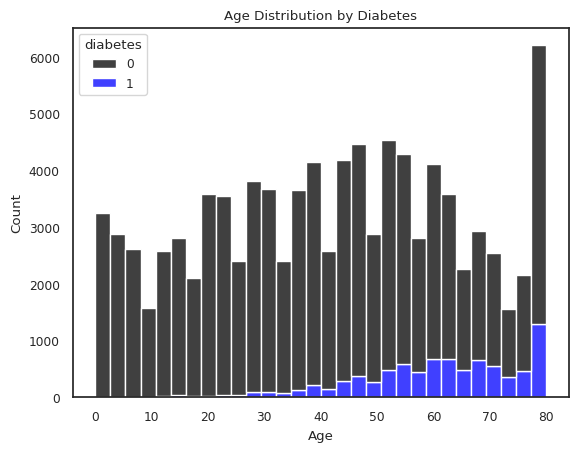

In [87]:
# Crear un histograma de la distribución de edad, separado por la variable 'diabetes'
palette_colors = {0: "black", 1: "blue"}

sns.histplot(data=df, x='age', bins=30, hue='diabetes', multiple='stack', palette=palette_colors)

# Añadir título y etiquetas a los ejes
plt.title('Age Distribution by Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

# aparece muchas registro de personas con edad superior a 80 años,
# las personas empiezan  a tener diabetes a partir de los 30 años, segun este resgistro

#Diagrama de barras para Gender

<ipython-input-88-8bed4ef93e0b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')


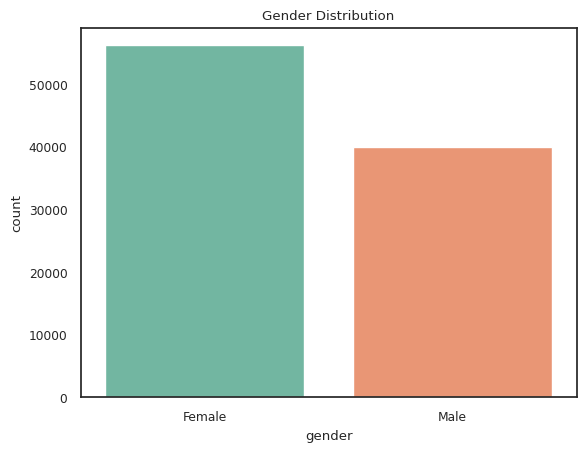

In [88]:
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Grafico de distribucion para BMI, vs diabetes

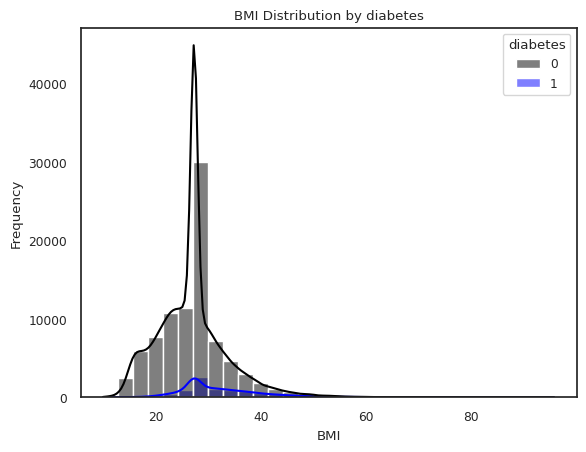

In [89]:
# Definir una paleta de colores personalizada
palette_colors = {0: "black", 1: "blue"}

# Usar histplot con una paleta de colores personalizada
sns.histplot(data=df, x='bmi', bins=30, kde=True, hue='diabetes', palette=palette_colors)
plt.title('BMI Distribution by diabetes')
plt.xlabel('BMI')  # Etiqueta para el eje X
plt.ylabel('Frequency')  # Etiqueta para el eje Y
plt.show()

# hay una relacion entre BMI y la diabetes

# Graficos para variables binarias

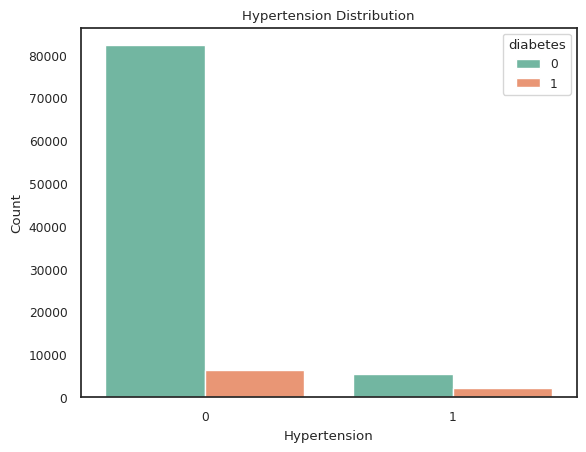

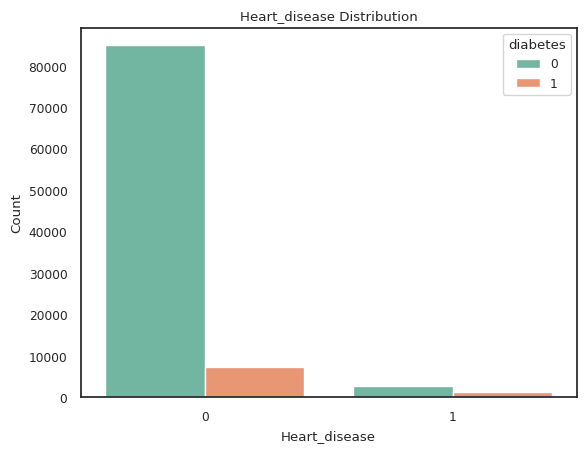

In [67]:
# Iterar sobre las columnas seleccionadas y crear gráficos de barras
for col in ['hypertension', 'heart_disease']:
    sns.countplot(x=col, data=df, hue='diabetes', palette='Set2')
    plt.title(f'{col.capitalize()} Distribution')  # Título con nombre de la variable
    plt.xlabel(col.capitalize())  # Etiqueta del eje X con la variable correspondiente
    plt.ylabel('Count')  # Etiqueta del eje Y
    plt.show()

# Grafico para smoking history

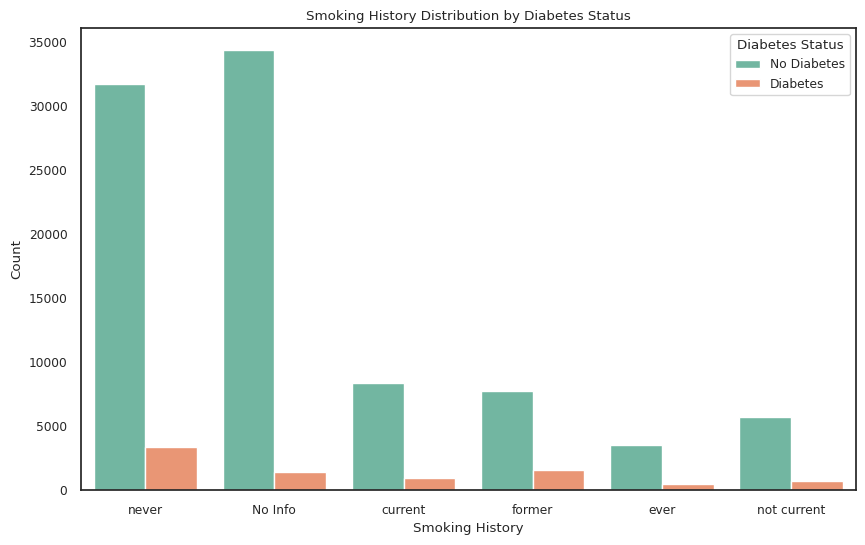

In [53]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='Set2')

# Configurar el título y mostrar el gráfico
plt.title('Smoking History Distribution by Diabetes Status')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.show()

 Relación entre Edad, diabetes y gender

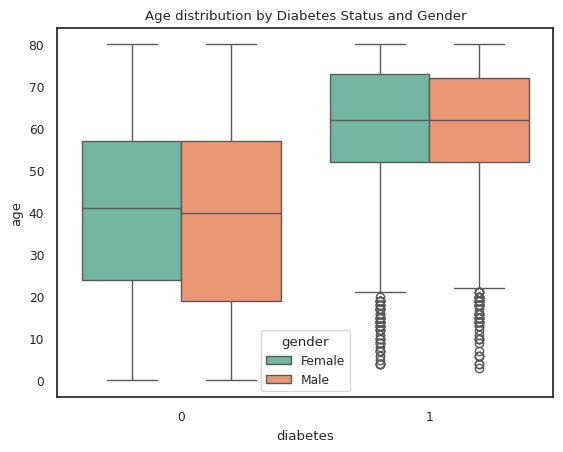

In [69]:
sns.boxplot(x='diabetes', y='age', hue='gender', palette='Set2', data=df)
plt.title('Age distribution by Diabetes Status and Gender')
plt.show()

# por el graficos se ve casos atípicos de jóvenes con diabetes,en ambos género

# hacer una copia


In [109]:
data = df.copy()


# ver el equilibrio de la variable dependiente


Porcentaje de cada clase:
diabetes
0    91.49847
1     8.50153
Name: proportion, dtype: float64


<ipython-input-99-83d082d239e9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


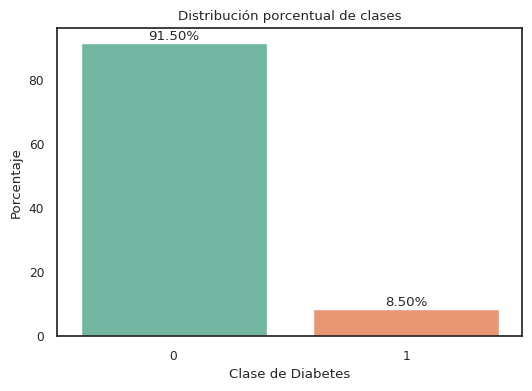

In [99]:
# Calcula el porcentaje de cada variable de la columna dependiente
class_counts = data['diabetes'].value_counts(normalize=True) * 100
print("Porcentaje de cada clase:")
print(class_counts)

#el conjunto de datos está desbalanceado
 # (con un 9% de casos positivos para la diabetes y un 91% de casos negativos)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Añadir etiquetas y título
plt.title('Distribución porcentual de clases')
plt.xlabel('Clase de Diabetes')
plt.ylabel('Porcentaje')

# Mostrar los valores porcentuales encima de las barras
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

# Mostrar el gráfico
plt.show()

# Escando las variables numéricas y las variables con encoding
Para Random Forest Clasificador no es estrictamente necesario pero si quiero comparar este resultado con otros modelos todos deben estar en las mismas condiciones como es escalado, pero para otros modelos como de regresión logistica, Support Vector Machines(SVM) si es necesario.

In [ ]:
#Separamos las variables en numericas y categoricas, para realizar encoding o ya ssea escalado o estandarizacion

In [137]:
# Identificar variables numéricas y categóricas
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Variables Numéricas:")
print(numerical_cols)

print("\nVariables Categóricas:")
print(categorical_cols)

Variables Numéricas:
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Sexo', 'Trabaja'],
      dtype='object')

Variables Categóricas:
Index(['gender', 'smoking_history'], dtype='object')


In [138]:
# Crear DataFrames para variables numéricas y categóricas
df_numerical = data[numerical_cols]
df_categorical = data[categorical_cols]

# scaled

In [140]:
# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Convertir el array resultante a un DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_cols)

# Encoder

In [147]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
df_categorical_encoded = data[categorical_cols].apply(label_encoder.fit_transform)
print(df_categorical_encoded)

       gender  smoking_history
0           0                4
1           0                0
2           1                4
3           0                1
4           1                1
...       ...              ...
99995       0                0
99996       0                0
99997       1                3
99998       0                4
99999       0                1

[99982 rows x 2 columns]


Concatenamos La función pd.concat() en pandas se utiliza para concatenar (o combinar) dos o más DataFrames u objetos similares, como Series, en un solo DataFrame. Es muy útil cuando deseas unir diferentes partes de datos, ya sea a lo largo de filas o columnas.

In [148]:
# @title
#Concatenar las variables escaladas y codificadas
df_final = pd.concat([df_numerical_scaled, df_categorical_encoded], axis=1)

# Verificar el DataFrame final
print(df_final.head())

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.692577     -0.284467       4.935916 -0.321051     1.001692   
1  0.537899     -0.284467      -0.202597 -0.000114     1.001692   
2 -0.616779     -0.284467      -0.202597 -0.000114     0.161089   
3 -0.261494     -0.284467      -0.202597 -0.583225    -0.492714   
4  1.514935      3.515345       4.935916 -1.081957    -0.679515   

   blood_glucose_level  diabetes      Sexo   Trabaja  gender  smoking_history  
0             0.047709 -0.304819 -0.841175  0.963456     0.0              4.0  
1            -1.426157 -0.304819 -0.841175 -1.153451     0.0              0.0  
2             0.489869 -0.304819  1.188813  0.963456     1.0              4.0  
3             0.416175 -0.304819 -0.841175 -0.624224     0.0              1.0  
4             0.416175 -0.304819  1.188813 -0.624224     1.0              1.0  


#guardar

In [219]:
# @title
# Guardar el DataFrame imputado en formato CSV
df_final.to_csv('df_final.csv', index=False)

# leer

In [222]:
# @title
# Leer el DataFrame desde el archivo CSV
df_final = pd.read_csv('df_final.csv')

# Mostrar las columnas del DataFrame
print("Columnas en el DataFrame CSV:")
print(df_final.columns)

Columnas en el DataFrame CSV:
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Sexo', 'Trabaja', 'gender',
       'smoking_history'],
      dtype='object')


#Matriz de Correlación

In [212]:
df_final.gender.unique()

array([ 0.,  1., nan])

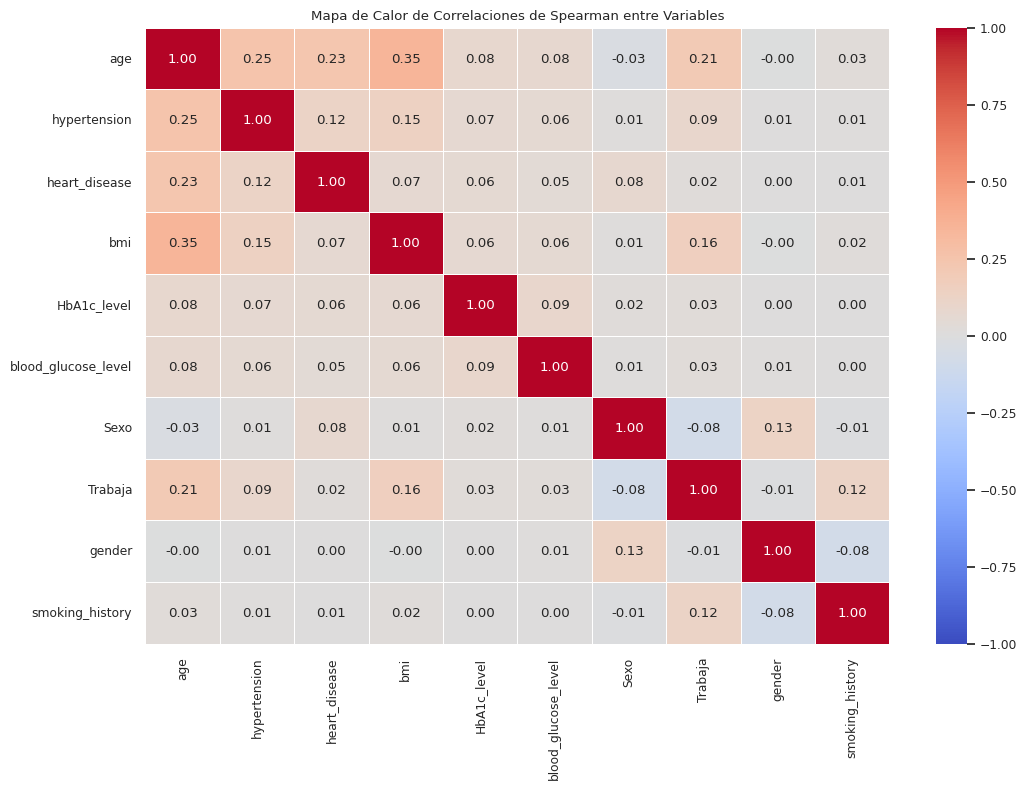

In [214]:
# Excluir la target 'diabetes' para el cálculo de la matriz de correlación
df_correlation = df_final.drop(columns=["diabetes"])



# Calcular la matriz de correlación usando el coeficiente de Spearman
corr_matrix = df_correlation.corr(method='spearman')

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones de Spearman entre Variables')
plt.show()

# Análisis de Predicción

In [216]:
# ver las columnas
df_final.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'Sexo', 'Trabaja', 'gender',
       'smoking_history'],
      dtype='object')

Dividimos el conjunto de datos en 80% y 20%

Entrenando los modelos

# regresion logistica

In [217]:

# Definir variables independientes (X) y la dependiente (y)
X = df_final.drop(columns=['diabetes'])
y = df_final['diabetes']

# Verificar y manejar valores faltantes en y
print("Valores faltantes en la variable objetivo:")
print(y.isnull().sum())

# Eliminar filas con valores faltantes en la variable objetivo
non_missing_indices = y.notna()
X = X[non_missing_indices]
y = y[non_missing_indices]

# Verificar los valores en y para asegurarse de que sean categóricos
print("Valores únicos en la variable objetivo:")
print(y.unique())

# Si y es continua pero debería ser categórica, conviértelo (ajusta según sea necesario)
# Ejemplo de binarización (ajustar según el contexto)
if y.dtype.kind in 'fi':  # Si 'y' es de tipo float o int
    y = pd.cut(y, bins=[-float('inf'), 0.5, float('inf')], labels=[0, 1])

# Verificar que y es categórico
print("Tipo de datos de la variable objetivo:")
print(y.dtype)

# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar si hay valores NaN en el conjunto de entrenamiento
print("Valores faltantes en el conjunto de entrenamiento (X):")
print(X_train.isnull().sum())

# Imputar valores faltantes en los datos de entrenamiento y prueba
imputer = SimpleImputer(strategy='mean')  # Puedes usar 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Crear el escalador
scaler = StandardScaler()

# Ajustar el escalador en las variables numéricas y transformar
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Crear el modelo de regresión logística
log_model = LogisticRegression()

# Ajustar el modelo con el conjunto de entrenamiento
log_model.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = log_model.predict(X_test_scaled)

conf_matrix_logistic = confusion_matrix(y_test, y_pred)

# Evaluar el modelo
print("Matriz de Confusión:")
print(conf_matrix_logistic)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Valores faltantes en la variable objetivo:
18
Valores únicos en la variable objetivo:
[-0.30481872  3.28063839]
Tipo de datos de la variable objetivo:
category
Valores faltantes en el conjunto de entrenamiento (X):
age                     0
hypertension            0
heart_disease           0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
Sexo                    0
Trabaja                 0
gender                 16
smoking_history        16
dtype: int64
Matriz de Confusión:
[[18063   159]
 [  650  1125]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18222
           1       0.88      0.63      0.74      1775

    accuracy                           0.96     19997
   macro avg       0.92      0.81      0.86     19997
weighted avg       0.96      0.96      0.96     19997



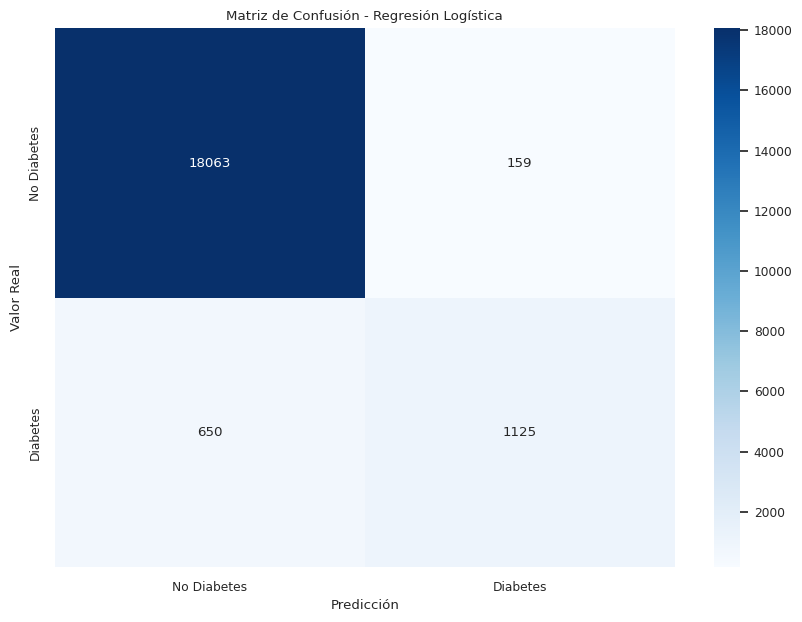

In [218]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

# modelo de Random Forest

In [207]:
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train_scaled, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test_scaled)

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred)
# Evaluar el modelo
print("Matriz de Confusión:")
print(conf_matrix_rf)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[18192    30]
 [  561  1214]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.98      0.68      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.97      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997



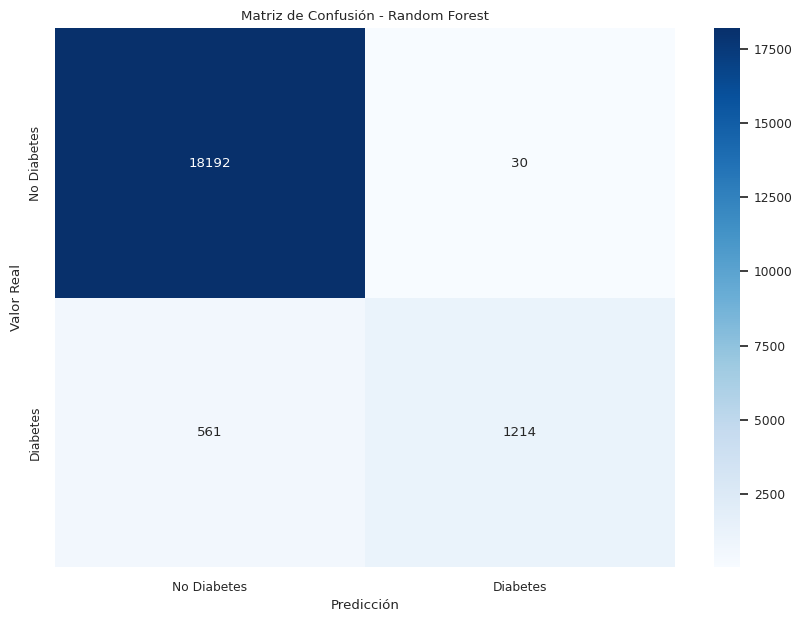

In [208]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# conclusiones
modelo de Random Forest, predice mejor que el modelo logistico.
la regresion logistica tiene una precicion superior al 80%  y forest superior al 97%.
Sin embargo ambos tienen un margen de error considerable en recall, estan por debajo del 70% de acierto para predecir la variable de diabetes que es la variable con el menor/marginal peso de  probabilidad de ocurrencia.